Import Library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

load model yang sudah dibuat

In [2]:
loaded_model = tf.keras.models.load_model('model.h5')

load data gambar yang akan di prediksi oleh model.

In [3]:
direc = Path('C:/Users/Administrator/Documents/Real Time Face Mask//Inf_img')
jpeg_filepaths = list(direc.glob("**/*.jpeg"))
jpg_filepaths = list(direc.glob("**/*.jpg"))
filepaths = jpeg_filepaths + jpg_filepaths
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))



filepaths = pd.Series(filepaths, name='Images').astype(str)
Labels = pd.Series(Labels, name='Labels').astype(str)


df = pd.merge(filepaths, Labels, right_index = True, left_index = True)

#Resampling it
pd.options.display.max_rows
df

,Images,Labels
0,C:\Users\Administrator\Documents\Real Time Fac...,WithMask
1,C:\Users\Administrator\Documents\Real Time Fac...,WithMask
2,C:\Users\Administrator\Documents\Real Time Fac...,WithoutMask
3,C:\Users\Administrator\Documents\Real Time Fac...,WithoutMask


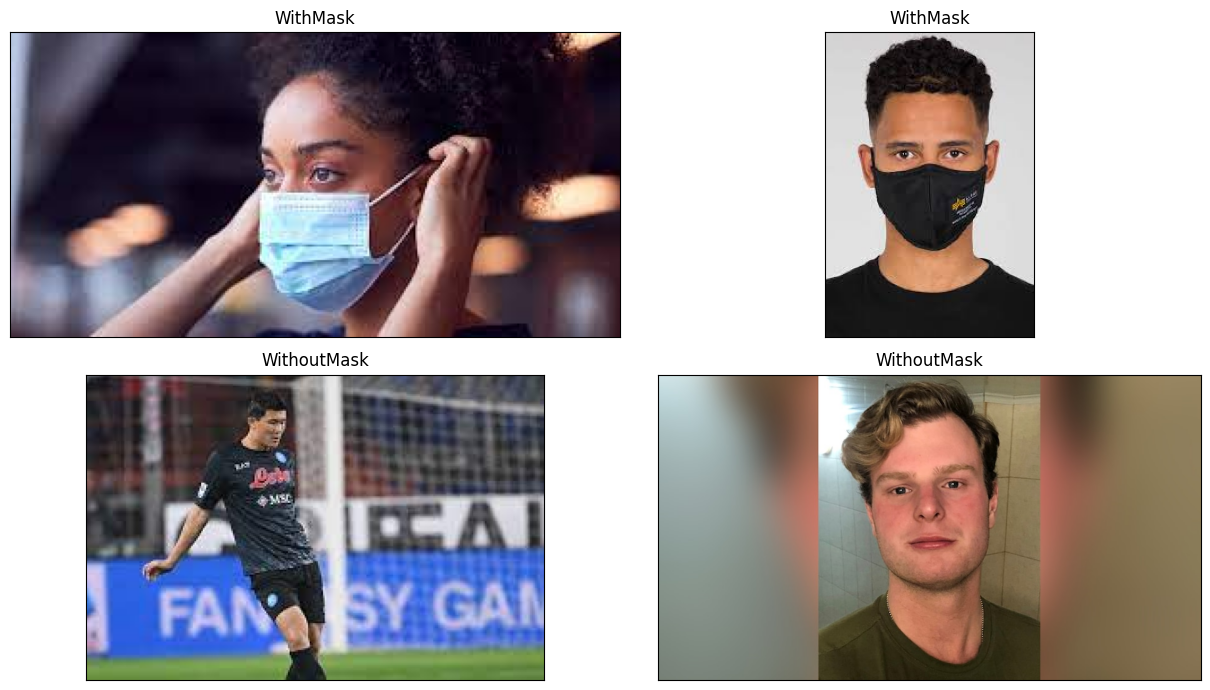

In [4]:
# Showing Images 
import matplotlib.pyplot as plt
f,a = plt.subplots(nrows=2, ncols=2,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.Images[i]))
    ax.set_title(df.Labels[i])
    
plt.tight_layout()
plt.show()

In [5]:
df2 = df.copy()

In [6]:
target_size = (224,224)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = test_datagen.flow_from_dataframe(df,
                                            target_size = target_size, x_col = 'Images', y_col ='Labels',
                                             class_mode = 'binary',
                                            batch_size = 32, shuffle = False)
prediction = loaded_model.predict(test_gen)

Found 4 validated image filenames belonging to 2 classes.


In [7]:
prediction

array([[2.8081472e-06],
       [1.2230174e-06],
       [2.1842747e-05],
       [9.8228663e-01]], dtype=float32)

In [8]:
def predict(model, data):
    '''
    Face Mask Prediction
    '''
    target_size = (224,224)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    test_gen = test_datagen.flow_from_dataframe(df,
                                            target_size = target_size, x_col = 'Images', y_col ='Labels',
                                             class_mode = 'binary',
                                            batch_size = 32, shuffle = False)
    prediction = model.predict(test_gen)
    prediction_classes = []
    for pred in prediction:
        if pred >= 0.5:
            prediction_classes.append(1)
        else:
            prediction_classes.append(0)
    data['Labels'] = prediction_classes
    for x in data['Labels']:
        if x == 0:
            x == 'WithMask'
        elif x == 1:
            x == 'WithoutMask'
    return data

predict(loaded_model, df2)

Found 4 validated image filenames belonging to 2 classes.


,Images,Labels
0,C:\Users\Administrator\Documents\Real Time Fac...,0
1,C:\Users\Administrator\Documents\Real Time Fac...,0
2,C:\Users\Administrator\Documents\Real Time Fac...,0
3,C:\Users\Administrator\Documents\Real Time Fac...,1


We can see our model still has difficulty predicting faces for images with faces that are far away.